# **AI-Powered Detection of Depression Risk Through Lifestyle and Psychological Data**


## **1 - Importing Required Libraries**

In [1]:
import pandas as pd #for data analysis and manipulation
import numpy as np # for numerical operations and arrays
import matplotlib.pyplot as plt # for for creating visualizations.
import seaborn as sns # for statistical data visualization, built on top of matplotlib.

## **2 - Loading The Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive') #Mounting Google Drive to access the csv file

#Define the path to the dataset file
file_path = '/content/drive/MyDrive/final_depression_dataset.csv'
# Read the CSV file into a Pandas DataFrame named 'df
df = pd.read_csv(file_path)

df.head(10) # Display the first 10 rows of the DataFrame to inspect the data

Mounted at /content/drive


,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No
5,Sanya,Female,60,Bhopal,Working Professional,Civil Engineer,NaN,1.0,NaN,NaN,4.0,7-8 hours,Unhealthy,MCA,Yes,12,3,Yes,No
6,Zara,Female,30,Pune,Working Professional,Accountant,NaN,4.0,NaN,NaN,2.0,More than 8 hours,Healthy,M.Com,No,3,1,No,No
7,Kiran,Male,30,Bangalore,Working Professional,Teacher,NaN,1.0,NaN,NaN,2.0,More than 8 hours,Unhealthy,BA,Yes,6,1,No,No
8,Kush,Male,56,Hyderabad,Working Professional,Lawyer,NaN,1.0,NaN,NaN,2.0,More than 8 hours,Moderate,LLM,Yes,11,5,Yes,No
9,Damini,Female,35,Srinagar,Working Professional,Content Writer,NaN,3.0,NaN,NaN,4.0,Less than 5 hours,Moderate,BCA,No,6,4,Yes,No


## **3 - Exploratory Data Analysis**

In [3]:
df.info() # Display information about the DataFrame, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    float64
 7   Work Pressure                          2054 non-null   float64
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    float64
 10  Job Satisfaction                       2054 non-null   float64
 11  Slee

In [4]:
#Check total number of missing values for each feature
df.isnull().sum()

,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,673
Academic Pressure,2054
Work Pressure,502
CGPA,2054
Study Satisfaction,2054


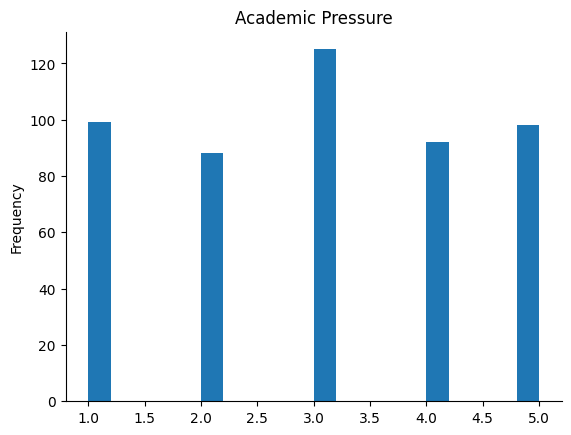

In [5]:
#Visualise the distribution of Academic Pressure
df['Academic Pressure'].plot(kind='hist', bins=20, title='Academic Pressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

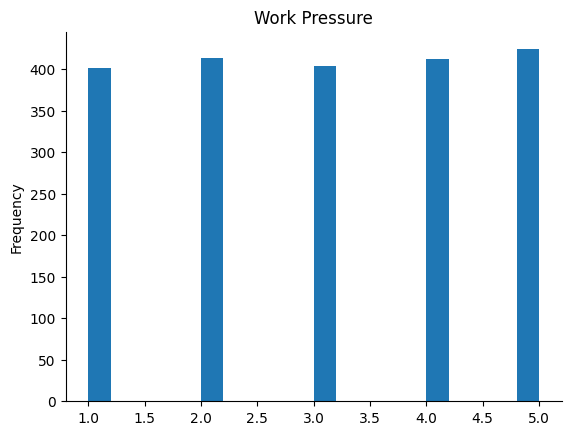

In [6]:
#Visualise the distribution of Academic Pressure
df['Work Pressure'].plot(kind='hist', bins=20, title='Work Pressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

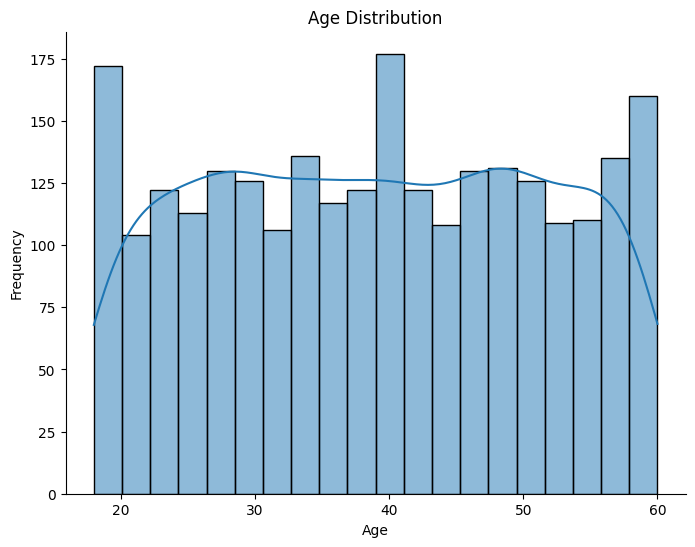

In [7]:
# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)  # 'Age' is the column name for age data
plt.title('Age Distribution')
plt.xlabel('Age') #x-axis title
plt.ylabel('Frequency')#y-axis title
plt.gca().spines[['top', 'right']].set_visible(False)  # Remove top and right spines
plt.show()

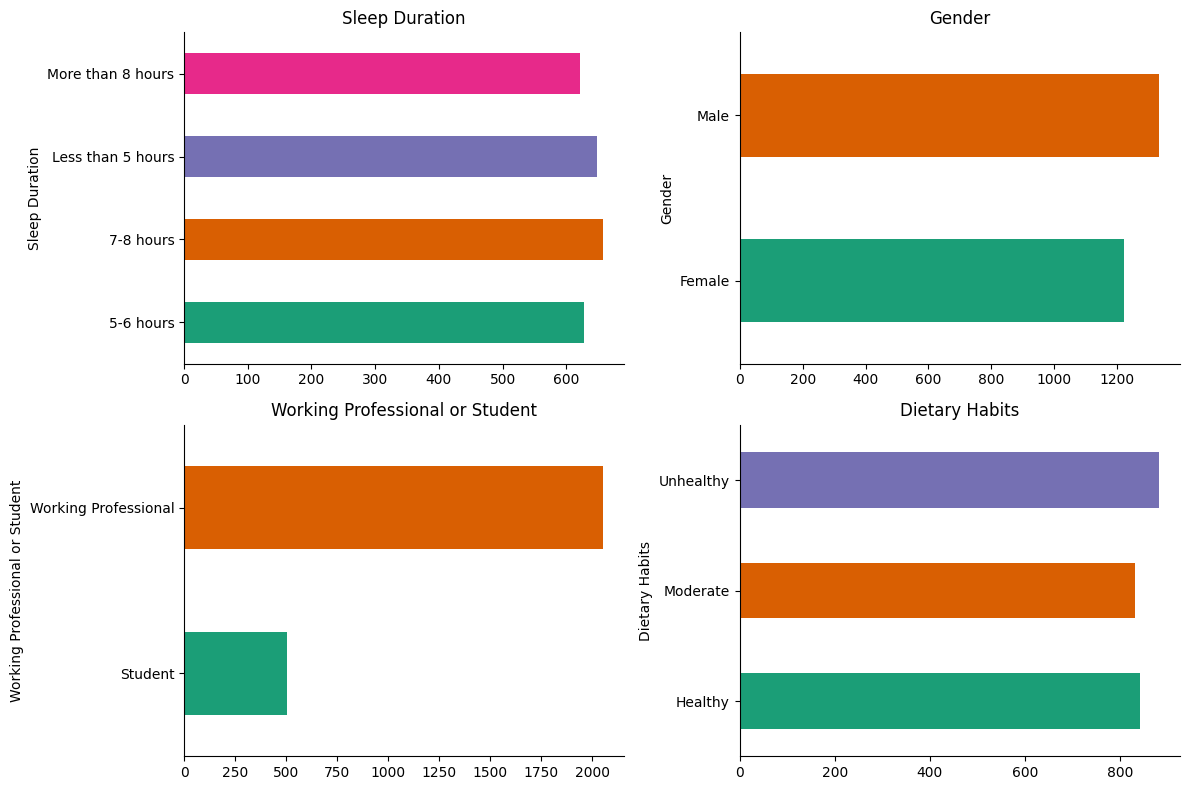

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Create a 2x2 grid of subplots

# Sleep Duration
df.groupby('Sleep Duration').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[0, 0])
axes[0, 0].set_title('Sleep Duration')
axes[0, 0].spines[['top', 'right']].set_visible(False)

# Gender
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[0, 1])
axes[0, 1].set_title('Gender')
axes[0, 1].spines[['top', 'right']].set_visible(False)

# Working Professional or Student
df.groupby('Working Professional or Student').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[1, 0])
axes[1, 0].set_title('Working Professional or Student')
axes[1, 0].spines[['top', 'right']].set_visible(False)

# Dietary Habits
df.groupby('Dietary Habits').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[1, 1])
axes[1, 1].set_title('Dietary Habits')
axes[1, 1].spines[['top', 'right']].set_visible(False)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()  # Display the plot

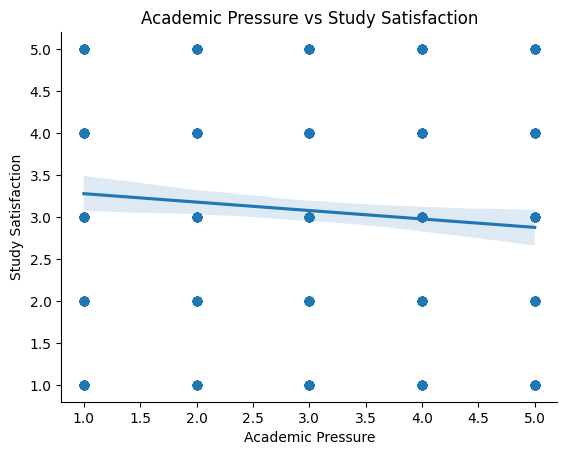

In [9]:
#Display relationship between academic pressure and study satisfaction
sns.regplot(x='Academic Pressure', y='Study Satisfaction', data=df) #Set academic pressure on x axis and study satifaction on y-axis
plt.title('Academic Pressure vs Study Satisfaction')
plt.xlabel('Academic Pressure') # x-axis title
plt.ylabel('Study Satisfaction') # y-axis title
plt.gca().spines[['top', 'right']].set_visible(False)  # Remove top and right spines for better aesthetics
plt.show()

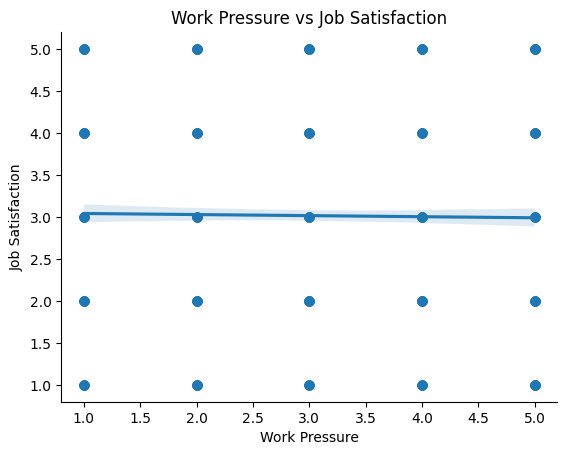

In [10]:
#Display relationship between work pressure and job satisfaction
sns.regplot(x='Work Pressure', y='Job Satisfaction', data=df)
plt.title('Work Pressure vs Job Satisfaction')
plt.xlabel('Work Pressure') # x-axis title
plt.ylabel('Job Satisfaction') # y-axis title
plt.gca().spines[['top', 'right']].set_visible(False)  # Remove top and right spines for better aesthetics
plt.show()

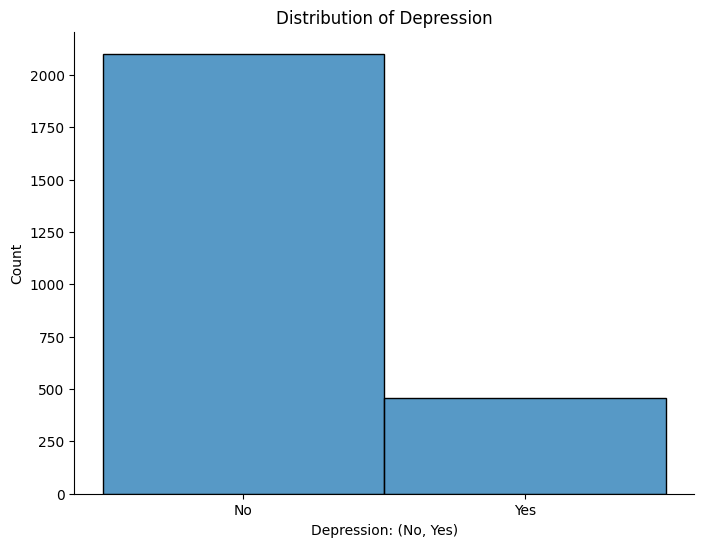

In [11]:
# Create the histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Depression'], bins=2, discrete=True)
plt.title('Distribution of Depression')
plt.xlabel('Depression: (No, Yes)')
plt.ylabel('Count')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

## **4 - Data Preprocessing**

### **4.1 - Drop Irrelevant Features**

In [12]:
#Drop Name and City features as they do not hold any value to the prediction task
df = df.drop(['Name', 'City'], axis=1)

### **4.2 - Handling Missing Values**

**Separate Data by Work Status**

In [13]:
# Filtering the dataframe to create a subset containing only rows where the individual is a 'Student'.
df_student = df[df['Working Professional or Student'] == 'Student']
# Filtering the dataframe to create a subset containing only rows where the individual is a 'Working Professional'.
df_working_professional = df[df['Working Professional or Student'] == 'Working Professional']

**Impute Missing Values for Students**

In [14]:
#Replace missing values with mean
df_student['Job Satisfaction'].fillna(df_working_professional['Job Satisfaction'].mean(), inplace=True)
df_student['Work Pressure'].fillna(df_working_professional['Work Pressure'].mean(), inplace=True)
#Replace missing values under profession for students to 'Student'
df_student['Profession'].fillna('Student', inplace=True)

<ipython-input-14-557a691fb6e5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_student['Job Satisfaction'].fillna(df_working_professional['Job Satisfaction'].mean(), inplace=True)
<ipython-input-14-557a691fb6e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_student['Job Satisfaction'].fillna(df_working_professional['Job Satisfaction

**Impute Missing Values for Working Professionals**

In [15]:
#Replace missing values with mean
df_working_professional['Study Satisfaction'].fillna(df_student['Study Satisfaction'].mean(), inplace=True)
df_working_professional['Academic Pressure'].fillna(df_student['Academic Pressure'].mean(), inplace=True)
df_working_professional['CGPA'].fillna(df_student['CGPA'].mean(), inplace=True)
#Replace missing professions to 'Unknown'
df_working_professional['Profession'].fillna('Unknown', inplace=True)

<ipython-input-15-b038c186c472>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_working_professional['Study Satisfaction'].fillna(df_student['Study Satisfaction'].mean(), inplace=True)
<ipython-input-15-b038c186c472>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_working_professional['Study Satisfaction'].fillna(df_student['Study Sati

**Concatenate the DataFrames**

In [16]:
#Create a new DataFrame which contains the updated subsets
df_updated = pd.concat([df_student, df_working_professional], ignore_index=True) #Join the subsets using pd.concat

#Check for Remaining Missing Values
print(df_updated.isnull().sum())

Gender                                   0
Age                                      0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


### **4.3 - Enhancing Data Clarity by Renaming Columns**

In [17]:
#Rename columns for data clarity
df_updated.rename(columns={'Have you ever had suicidal thoughts ?': 'SuicidalThoughts'}, inplace=True) #New name: SuicidalThoughts
df_updated.rename(columns={'Family History of Mental Illness': 'FamilyHistory'}, inplace=True) #New name: FamilyHistory
df_updated.rename(columns={'Working Professional or Student': 'WorkingOrStudying'}, inplace=True) #New name: WorkingOrStudying

In [18]:
#Display updated dataframe
df_updated.head(30)

,Gender,Age,WorkingOrStudying,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,SuicidalThoughts,Work/Study Hours,Financial Stress,FamilyHistory,Depression
0,Male,28,Student,Student,2.0,3.021908,6.51,4.0,3.015093,7-8 hours,Moderate,BA,Yes,9,2,Yes,No
1,Male,28,Student,Student,4.0,3.021908,7.48,5.0,3.015093,5-6 hours,Healthy,MD,Yes,7,1,Yes,No
2,Male,25,Student,Student,1.0,3.021908,7.21,3.0,3.015093,5-6 hours,Unhealthy,MBBS,Yes,10,4,No,Yes
3,Male,23,Student,Student,1.0,3.021908,9.90,4.0,3.015093,More than 8 hours,Unhealthy,MSc,Yes,7,2,Yes,No
4,Female,31,Student,Student,1.0,3.021908,5.97,5.0,3.015093,More than 8 hours,Healthy,LLM,Yes,4,2,Yes,No
5,Male,19,Student,Student,4.0,3.021908,9.05,4.0,3.015093,5-6 hours,Unhealthy,Class 12,Yes,1,4,Yes,Yes
6,Female,34,Student,Student,4.0,3.021908,9.96,2.0,3.015093,More than 8 hours,Moderate,B.Com,Yes,6,2,No,Yes
7,Female,20,Student,Student,4.0,3.021908,6.17,1.0,3.015093,More than 8 hours,Healthy,Class 12,Yes,3,4,Yes,Yes
8,Female,33,Student,Student,1.0,3.021908,6.50,4.0,3.015093,More than 8 hours,Moderate,MBBS,No,10,3,No,No
9,Male,33,Student,Student,4.0,3.021908,6.75,3.0,3.015093,Less than 5 hours,Unhealthy,MA,Yes,10,1,No,Yes


### **4.4 - Group Age Column**

In [19]:
# Define age ranges and corresponding labels
age_bins = [0, 19, 60, float('inf')]  # Define age ranges: 0-19 (Teen), 20-59 (Adult), 60+ (Senior)
age_labels = ['Teen', 'Adult', 'Senior']

# Create a new column 'AgeGroup' based on age ranges
df_updated['AgeGroup'] = pd.cut(df_updated['Age'], bins=age_bins, labels=age_labels, right=False)

#Drop Age as it is redundant
df_updated.drop('Age', axis=1, inplace=True)

# Display the updated DataFrame
df_updated.head()  # Or df_updated

,Gender,WorkingOrStudying,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,SuicidalThoughts,Work/Study Hours,Financial Stress,FamilyHistory,Depression,AgeGroup
0,Male,Student,Student,2.0,3.021908,6.51,4.0,3.015093,7-8 hours,Moderate,BA,Yes,9,2,Yes,No,Adult
1,Male,Student,Student,4.0,3.021908,7.48,5.0,3.015093,5-6 hours,Healthy,MD,Yes,7,1,Yes,No,Adult
2,Male,Student,Student,1.0,3.021908,7.21,3.0,3.015093,5-6 hours,Unhealthy,MBBS,Yes,10,4,No,Yes,Adult
3,Male,Student,Student,1.0,3.021908,9.90,4.0,3.015093,More than 8 hours,Unhealthy,MSc,Yes,7,2,Yes,No,Adult
4,Female,Student,Student,1.0,3.021908,5.97,5.0,3.015093,More than 8 hours,Healthy,LLM,Yes,4,2,Yes,No,Adult


### **4.5 - Group Degree Column**

In [20]:
# Get unique values from the 'Degree' column
unique_degrees = df_updated['Degree'].unique()

# Print the unique degrees to inspect them
print(unique_degrees)

#Mapping the degrees
degree_groups = {
    'Undergrad' : ['BA', 'B.Tech','B.Com','B.Arch','B.Ed','BBA','BCA','BE','BSc','BHM','B.Pharm','LLB'],
    'Postgrad': ['MD', 'MBBS', 'MSc','LLM','MA','M.Pharm','MCA','M.Tech','MHM','ME','M.Com','MBA','M.Ed'],
    'PhD': ['PhD'],
    'Other': ['Class 12']
}

#Define a function to assign degree under a group
def group_degrees(degree):
  #Iterate through the degree_group mapping
    for group, degrees in degree_groups.items():
      #Check if the degree is in the degree_group dictionary
        if degree in degrees:
            return group #return the group
    return 'Other'

# Apply the mapping function to create the 'DegreeGroup' column
df_updated['DegreeGroup'] = df_updated['Degree'].apply(group_degrees)

#Drop Degree
df_updated.drop('Degree', axis=1, inplace=True)

#Display the updated DataFrame
df_updated.head()


['BA' 'MD' 'MBBS' 'MSc' 'LLM' 'Class 12' 'B.Com' 'MA' 'M.Pharm' 'B.Arch'
 'M.Com' 'MBA' 'B.Ed' 'BBA' 'BCA' 'M.Tech' 'M.Ed' 'BE' 'MCA' 'LLB' 'BSc'
 'B.Tech' 'PhD' 'BHM' 'B.Pharm' 'MHM' 'ME']


,Gender,WorkingOrStudying,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,SuicidalThoughts,Work/Study Hours,Financial Stress,FamilyHistory,Depression,AgeGroup,DegreeGroup
0,Male,Student,Student,2.0,3.021908,6.51,4.0,3.015093,7-8 hours,Moderate,Yes,9,2,Yes,No,Adult,Undergrad
1,Male,Student,Student,4.0,3.021908,7.48,5.0,3.015093,5-6 hours,Healthy,Yes,7,1,Yes,No,Adult,Postgrad
2,Male,Student,Student,1.0,3.021908,7.21,3.0,3.015093,5-6 hours,Unhealthy,Yes,10,4,No,Yes,Adult,Postgrad
3,Male,Student,Student,1.0,3.021908,9.90,4.0,3.015093,More than 8 hours,Unhealthy,Yes,7,2,Yes,No,Adult,Postgrad
4,Female,Student,Student,1.0,3.021908,5.97,5.0,3.015093,More than 8 hours,Healthy,Yes,4,2,Yes,No,Adult,Postgrad


In [21]:
# Extracting the unique values from the 'DegreeGroup' column in the updated dataframe.
u_degree = df_updated['DegreeGroup'].unique()
print(u_degree)

#Count the Degree categories
degree_group_counts = df_updated['DegreeGroup'].value_counts()
print(degree_group_counts)

['Undergrad' 'Postgrad' 'Other' 'PhD']
DegreeGroup
Undergrad    1109
Postgrad     1091
Other         275
PhD            81
Name: count, dtype: int64


### **4.6 Handling Sleep Duration**

In [22]:
unique_sleep_durations = df_updated['Sleep Duration'].unique()
print(unique_sleep_durations)

['7-8 hours' '5-6 hours' 'More than 8 hours' 'Less than 5 hours']


In [23]:
#Mapping Sleep Durations
SleepDurations_mapping = {
    'Less than 5 hours' : 1,
    '5-6 hours' : 2,
    '7-8 hours': 3,
    'More than 8 hours': 4
}

df_updated['SleepDurationEncoded'] = df_updated['Sleep Duration'].map(SleepDurations_mapping)
df_updated.drop('Sleep Duration', axis=1, inplace=True)

In [24]:
df_updated.head()

,Gender,WorkingOrStudying,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,SuicidalThoughts,Work/Study Hours,Financial Stress,FamilyHistory,Depression,AgeGroup,DegreeGroup,SleepDurationEncoded
0,Male,Student,Student,2.0,3.021908,6.51,4.0,3.015093,Moderate,Yes,9,2,Yes,No,Adult,Undergrad,3
1,Male,Student,Student,4.0,3.021908,7.48,5.0,3.015093,Healthy,Yes,7,1,Yes,No,Adult,Postgrad,2
2,Male,Student,Student,1.0,3.021908,7.21,3.0,3.015093,Unhealthy,Yes,10,4,No,Yes,Adult,Postgrad,2
3,Male,Student,Student,1.0,3.021908,9.90,4.0,3.015093,Unhealthy,Yes,7,2,Yes,No,Adult,Postgrad,4
4,Female,Student,Student,1.0,3.021908,5.97,5.0,3.015093,Healthy,Yes,4,2,Yes,No,Adult,Postgrad,4


### **4.7 - Grouping Professions into Sectors**

In [25]:
#Print unique values
unique_professions = df_updated['Profession'].unique()
print(unique_professions)

['Student' 'Teacher' 'Financial Analyst' 'UX/UI Designer' 'Civil Engineer'
 'Accountant' 'Lawyer' 'Content Writer' 'Unknown' 'Pilot'
 'Customer Support' 'Judge' 'Architect' 'HR Manager' 'Digital Marketer'
 'Sales Executive' 'Business Analyst' 'Mechanical Engineer' 'Consultant'
 'Data Scientist' 'Pharmacist' 'Software Engineer' 'Travel Consultant'
 'Manager' 'Entrepreneur' 'Doctor' 'Researcher' 'Plumber'
 'Finanancial Analyst' 'Marketing Manager' 'Educational Consultant'
 'Chemist' 'Research Analyst' 'Chef' 'Electrician' 'Graphic Designer'
 'Investment Banker']


In [26]:
#Mapping the professions into categories
sector_mapping = {
    'Education': ['Student', 'Teacher', 'Educational Consultant', 'Researcher'],
    'Finance': ['Financial Analyst', 'Accountant', 'Investment Banker', 'Business Analyst'],
    'Technology': ['UX/UI Designer', 'Data Scientist', 'Software Engineer'],
    'Engineering': ['Civil Engineer', 'Mechanical Engineer'],
    'Legal': ['Lawyer', 'Judge'],
    'Creative': ['Content Writer', 'Graphic Designer', 'Architect', 'Digital Marketer', 'Artist', 'Musician', 'Actor', 'Designer'], # Added some creative fields from previous examples
    'Healthcare': ['Doctor', 'Pharmacist', 'Chemist'],
    'Business': ['HR Manager', 'Sales Executive', 'Consultant', 'Manager', 'Entrepreneur', 'Marketing Manager', 'Travel Consultant', 'Customer Support'],
    'Other': ['Unknown', 'Pilot', 'Researcher', 'Plumber', 'Electrician', 'Chef'],  # Less common or uncategorized professions
}

# Define a function to assign a sector based on a profession using the sector_mapping
def assign_sector(profession):
  #Iterate through the sector mapping dictionary
    for sector, professions in sector_mapping.items():
      #Check if the profession exist in the list of professions
        if profession in professions:
            return sector #return the matching sector
    return 'Other'  # Assign to 'Other' if not found in mapping

#Apply the function to the 'Profession' column
df_updated['Sector'] = df_updated['Profession'].apply(assign_sector)

df_updated.drop('Profession', axis=1, inplace=True)

df_updated.head()

,Gender,WorkingOrStudying,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,SuicidalThoughts,Work/Study Hours,Financial Stress,FamilyHistory,Depression,AgeGroup,DegreeGroup,SleepDurationEncoded,Sector
0,Male,Student,2.0,3.021908,6.51,4.0,3.015093,Moderate,Yes,9,2,Yes,No,Adult,Undergrad,3,Education
1,Male,Student,4.0,3.021908,7.48,5.0,3.015093,Healthy,Yes,7,1,Yes,No,Adult,Postgrad,2,Education
2,Male,Student,1.0,3.021908,7.21,3.0,3.015093,Unhealthy,Yes,10,4,No,Yes,Adult,Postgrad,2,Education
3,Male,Student,1.0,3.021908,9.90,4.0,3.015093,Unhealthy,Yes,7,2,Yes,No,Adult,Postgrad,4,Education
4,Female,Student,1.0,3.021908,5.97,5.0,3.015093,Healthy,Yes,4,2,Yes,No,Adult,Postgrad,4,Education


In [27]:
#Print distinct sectors
u_sector = df_updated['Sector'].unique()
print(u_sector)
#Count the total occurence of the sectors
degree_group_counts = df_updated['Sector'].value_counts()
print(degree_group_counts)

['Education' 'Finance' 'Technology' 'Engineering' 'Legal' 'Creative'
 'Other' 'Business' 'Healthcare']
Sector
Education      913
Business       419
Other          390
Creative       246
Healthcare     200
Finance        135
Technology     102
Legal           90
Engineering     61
Name: count, dtype: int64


### **4.8 - Label Encoding**

In [28]:
#Import LabelEncoder library
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['Gender', 'WorkingOrStudying', 'Dietary Habits', 'SuicidalThoughts', 'FamilyHistory', 'Depression', 'AgeGroup', 'Sector', 'DegreeGroup']

# Iterate through the columns and apply label encoding, store mappings in a dictionary
encoding_mappings = {}
for column in columns_to_encode:
    df_updated[column] = label_encoder.fit_transform(df_updated[column])
    encoding_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the encoding mappings for each column
for column, mapping in encoding_mappings.items():
    print(f"Encoding mapping for {column}:")
    print(mapping)
    print("\n")

Encoding mapping for Gender:
{'Female': 0, 'Male': 1}


Encoding mapping for WorkingOrStudying:
{'Student': 0, 'Working Professional': 1}


Encoding mapping for Dietary Habits:
{'Healthy': 0, 'Moderate': 1, 'Unhealthy': 2}


Encoding mapping for SuicidalThoughts:
{'No': 0, 'Yes': 1}


Encoding mapping for FamilyHistory:
{'No': 0, 'Yes': 1}


Encoding mapping for Depression:
{'No': 0, 'Yes': 1}


Encoding mapping for AgeGroup:
{'Adult': 0, 'Senior': 1, 'Teen': 2}


Encoding mapping for Sector:
{'Business': 0, 'Creative': 1, 'Education': 2, 'Engineering': 3, 'Finance': 4, 'Healthcare': 5, 'Legal': 6, 'Other': 7, 'Technology': 8}


Encoding mapping for DegreeGroup:
{'Other': 0, 'PhD': 1, 'Postgrad': 2, 'Undergrad': 3}




## **5 - Model Development**

### **5.1 - Logistic Regression**



In [29]:
#Import the train_test_split function from scikit-learn to split the dataset into training and testing subsets
from sklearn.model_selection import train_test_split
#Import LogisticRegression to perform the classification task
from sklearn.linear_model import LogisticRegression
#To calculate the accuracy, precision (true positives / (true positives + false positives)), recall (true positives / (true positives + false negatives)),f1-score etc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, mean_squared_error

In [30]:
# Define features (X) and target (y)
X = df_updated.drop('Depression', axis=1)
y = df_updated['Depression']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

In [31]:
# Create a Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [32]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

Accuracy: 0.91
Mean Squared Error (MSE): 0.09
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       415
           1       0.83      0.67      0.74        97

    accuracy                           0.91       512
   macro avg       0.88      0.82      0.84       512
weighted avg       0.91      0.91      0.91       512



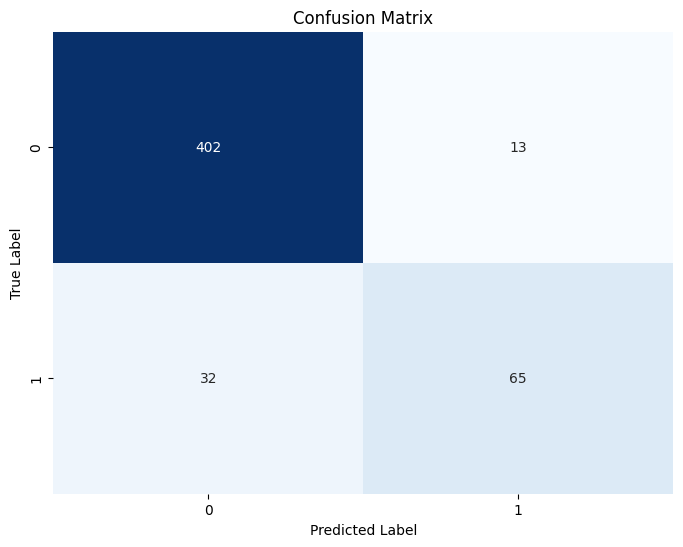

In [33]:
#To generate a classification report
from sklearn.metrics import classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# #Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

#Create classification report
report = classification_report(y_test, y_pred)
print(report)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


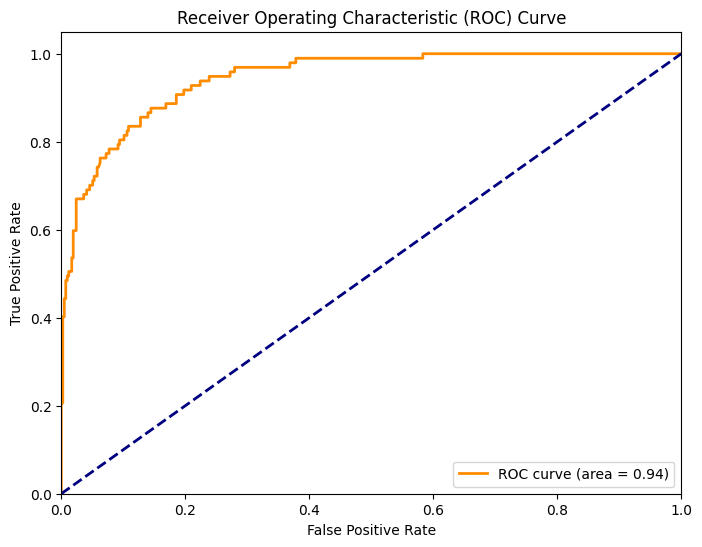

In [34]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (class 1)
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### **5.2 - Decision Tree**

In [35]:
#Importing DecisionTreeClassifier to build a decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [36]:
# Create a DecisionTreeClassifier object
tree_model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters if needed

# Train the model using your training data
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
# Predict on the testing data
y_pred_tree = tree_model.predict(X_test)

In [38]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy: {accuracy:.2f}")

# Calculate ROC AUC score
roc_auc_tree = roc_auc_score(y_test, y_pred_tree)
print(f"ROC AUC Score: {roc_auc_tree:.2f}")

# Generate the classification report
report = classification_report(y_test, y_pred_tree)
# Print the report
print(report)

#Create confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Confusion Matrix:")
print(conf_matrix_tree)

Accuracy: 0.86
ROC AUC Score: 0.77
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       415
           1       0.64      0.63      0.64        97

    accuracy                           0.86       512
   macro avg       0.78      0.77      0.78       512
weighted avg       0.86      0.86      0.86       512

Confusion Matrix:
[[381  34]
 [ 36  61]]


### **5.3 - XGBoost**

In [39]:
!pip install xgboost==2.1.3

In [40]:
#Import XBGClassifer for classification
from xgboost import XGBClassifier

# Create an XGBoost classifier object
xgb_model = XGBClassifier(random_state=42)  # You can adjust hyperparameters here

# Train the model using your training data
xgb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_xgb = xgb_model.predict(X_test)

In [41]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.2f}")

# Calculate ROC AUC score
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
print(f"ROC AUC Score: {roc_auc_tree:.2f}")

# Generate the classification report
report = classification_report(y_test, y_pred_xgb)

# Print the report
print(report)

# Create and display the confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:")
print(conf_matrix_xgb)

Accuracy: 0.90
ROC AUC Score: 0.77
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       415
           1       0.76      0.70      0.73        97

    accuracy                           0.90       512
   macro avg       0.85      0.83      0.84       512
weighted avg       0.90      0.90      0.90       512

Confusion Matrix:
[[394  21]
 [ 29  68]]


## **6. Factor Analysis for Feature Importance**





In [42]:
#Install SHAP
!pip install shap==0.42.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.0/548.0 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: slicer
    Found existing installation: slicer 0.0.8
    Uninstalling slicer-0.0.8:
      Successfully uninstalled slicer-0.0.8
  Attempting uninstall: shap
    Found existing installation: shap 0.46.0
    Uninstalling shap-0.46.0:
      Successfully uninstalled shap-0.46.0


In [43]:
import shap

# Create the explainer
explainer = shap.Explainer(model, X_train)  # 'model' is your trained Logistic Regression model

# Calculate SHAP values for the test set
shap_values = explainer(X_test)


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


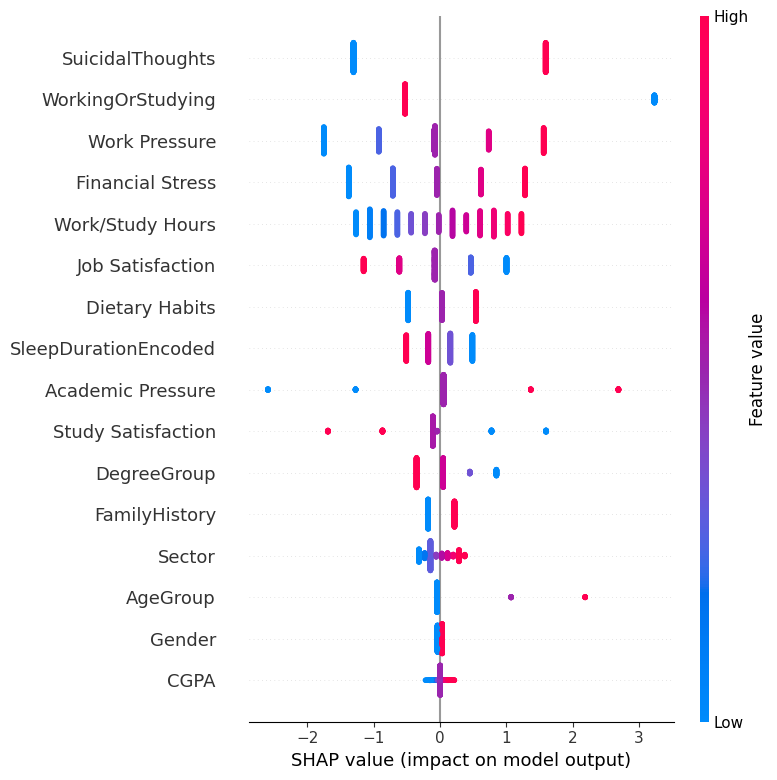

In [44]:
# Create the summary plot
shap.summary_plot(shap_values, X_test)

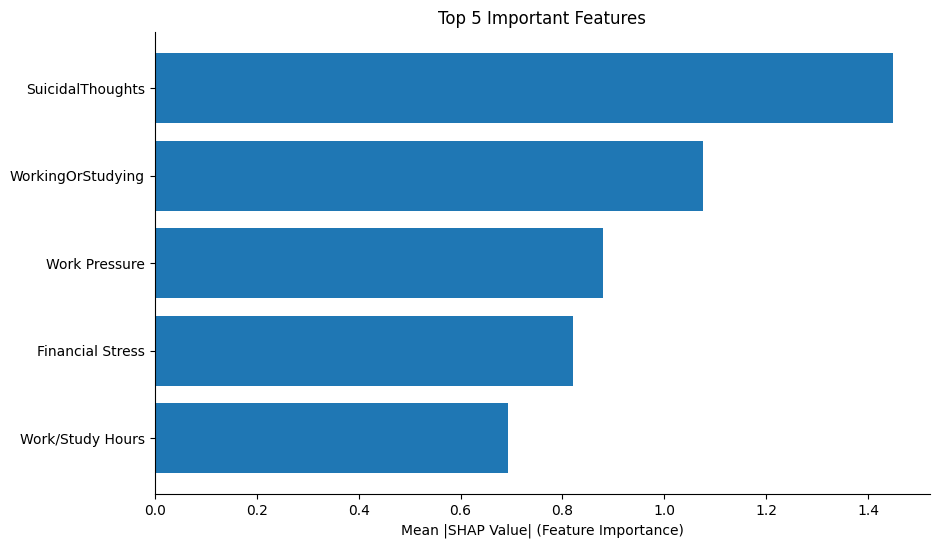

In [45]:
# Get the feature importance based on mean absolute SHAP values
feature_importance = np.mean(np.abs(shap_values.values), axis=0)

# Sort features by importance and get the top 5
sorted_idx = np.argsort(feature_importance)[-5:]  # Indices of top 5 features
top_features = X_test.columns[sorted_idx]

# Create a bar plot of the top 5 features
plt.figure(figsize=(10, 6))
plt.barh(top_features, feature_importance[sorted_idx])
plt.xlabel("Mean |SHAP Value| (Feature Importance)")
plt.title("Top 5 Important Features")
plt.gca().spines[['top', 'right']].set_visible(False)  # Remove top and right spines for better aesthetics
plt.show()

### **6.1 Model Development Based on High Feature Values**


In [46]:
# Select the important features for the model
selected_features = ['SuicidalThoughts', 'WorkingOrStudying', 'Work Pressure', 'Financial Stress','Job Satisfaction', 'Work/Study Hours','FamilyHistory','SleepDurationEncoded']
X_selected = df_updated[selected_features]

# Split data into training and testing sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# Create and train the Logistic Regression model with selected features
selected_model = LogisticRegression(max_iter=1000)
selected_model.fit(X_train_selected, y_train)

# Make predictions on the testing data
y_pred_selected = selected_model.predict(X_test_selected)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred_selected))

#Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_selected))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       415
           1       0.75      0.52      0.61        97

    accuracy                           0.88       512
   macro avg       0.82      0.74      0.77       512
weighted avg       0.87      0.88      0.87       512


Confusion Matrix:
[[398  17]
 [ 47  50]]


## **7. Application of Neural Network**

In [47]:
# Import the PyTorch library
import torch
# Import the nn module from PyTorch, this contains classes for building neural networks
import torch.nn as nn
#provides optimization algorithms for training neural networks
import torch.optim as optim

In [48]:
#Select X features and y (target)
X_selected_nn = df_updated.drop('Depression', axis = 1)
y_nn = df_updated['Depression']

In [49]:
#Split dataset into training and testing set. 80% training and 20% testing
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_selected_nn, y_nn, test_size=0.2, random_state=42)

# Convert DataFrame columns to numeric, handling errors
X_train_nn = X_train_nn.apply(pd.to_numeric, errors='coerce')
X_test_nn = X_test_nn.apply(pd.to_numeric, errors='coerce')

# Convert to PyTorch tensors
X_train_nn = torch.tensor(X_train_nn.values, dtype=torch.float32)
X_test_nn = torch.tensor(X_test_nn.values, dtype=torch.float32)
y_train_nn = torch.tensor(y_train_nn.values, dtype=torch.long)
y_test_nn = torch.tensor(y_test_nn.values, dtype=torch.long)

In [50]:
#Define a class for neural network
class DepressionNN(nn.Module):
    #Initialise the neural networks structure
    def __init__(self, input_size):
        super(DepressionNN, self).__init__()
        #Define first fully connected layer (dense layer)
        #Takes input size and outputs 64 features
        self.fc1 = nn.Linear(input_size, 64)
       # Define the activation function (ReLU) to introduce non-linearity
        self.relu = nn.ReLU()
        #Define second fully connected layer
        self.fc2 = nn.Linear(64, 2)  # Output layer for binary classification. Takes 64 features from hidden layer and outputs 2 for binary classification

#Define forward pass to the neural network
    def forward(self, x):
      #Pass input to the first fully connected layer
        out = self.fc1(x)
        #Apply ReLU function to the output of the first layer
        out = self.relu(out)
        #Pass the result to the second fully connected layer
        out = self.fc2(out)
        return out

In [51]:
input_size = X_train.shape[1]  # Number of features
#Define DepressionNN model
nn_model = DepressionNN(input_size)
#Define loss function for binary classification
criterion = nn.CrossEntropyLoss()
#Define Adam optimiser
optimizer = optim.Adam(nn_model.parameters())  #Pass the models parameters to the optimiser

epochs = 1000  # initialise number of epochs
for epoch in range(epochs):
    # Forward pass
    outputs = nn_model(X_train_nn)
    loss = criterion(outputs, y_train_nn) #Fit the loss function (CrossEntropyLoss) on the ouput and train

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress loss for every 10 epoch
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/1000], Loss: 0.7958
Epoch [20/1000], Loss: 0.5165
Epoch [30/1000], Loss: 0.4915
Epoch [40/1000], Loss: 0.4777
Epoch [50/1000], Loss: 0.4488
Epoch [60/1000], Loss: 0.4285
Epoch [70/1000], Loss: 0.4100
Epoch [80/1000], Loss: 0.3928
Epoch [90/1000], Loss: 0.3766
Epoch [100/1000], Loss: 0.3612
Epoch [110/1000], Loss: 0.3463
Epoch [120/1000], Loss: 0.3323
Epoch [130/1000], Loss: 0.3191
Epoch [140/1000], Loss: 0.3071
Epoch [150/1000], Loss: 0.2961
Epoch [160/1000], Loss: 0.2860
Epoch [170/1000], Loss: 0.2769
Epoch [180/1000], Loss: 0.2684
Epoch [190/1000], Loss: 0.2605
Epoch [200/1000], Loss: 0.2532
Epoch [210/1000], Loss: 0.2467
Epoch [220/1000], Loss: 0.2410
Epoch [230/1000], Loss: 0.2358
Epoch [240/1000], Loss: 0.2312
Epoch [250/1000], Loss: 0.2271
Epoch [260/1000], Loss: 0.2233
Epoch [270/1000], Loss: 0.2199
Epoch [280/1000], Loss: 0.2169
Epoch [290/1000], Loss: 0.2140
Epoch [300/1000], Loss: 0.2114
Epoch [310/1000], Loss: 0.2090
Epoch [320/1000], Loss: 0.2068
Epoch [330/1000],

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       415
           1       0.83      0.69      0.75        97

    accuracy                           0.91       512
   macro avg       0.88      0.83      0.85       512
weighted avg       0.91      0.91      0.91       512



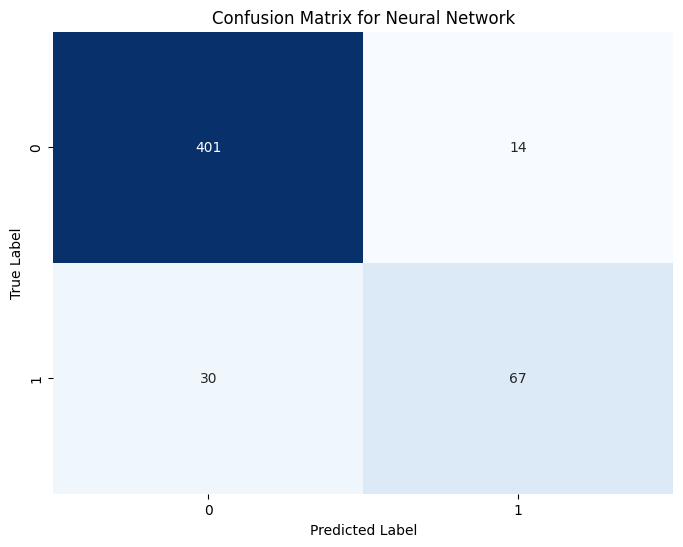

In [52]:
# Make predictions
with torch.no_grad():
    y_pred = nn_model(X_test_nn)
    _, predicted = torch.max(y_pred, 1)

# Calculate evaluation metrics
print(classification_report(y_test_nn, predicted))

conf_matrix_nn = confusion_matrix(y_test_nn, predicted)
# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Neural Network')
plt.show()

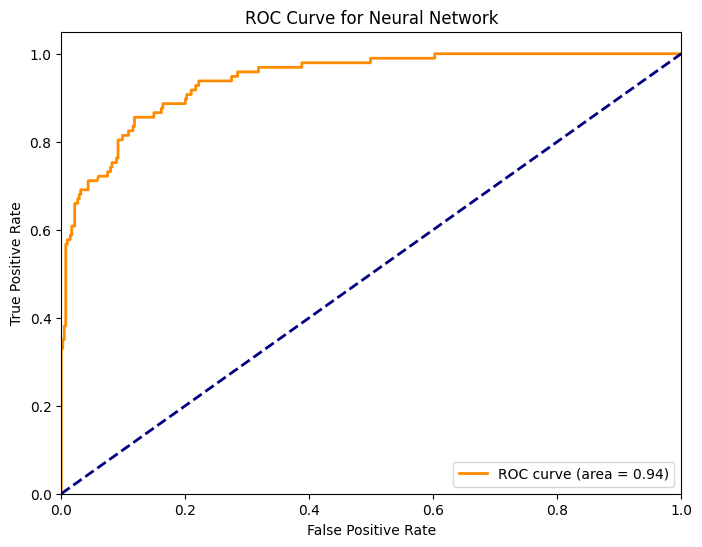

In [53]:
fpr, tpr, thresholds = roc_curve(y_test_nn, y_pred[:, 1])  # Get probabilities for class 1
roc_auc_nn = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural Network')
plt.legend(loc="lower right")
plt.show()

## **8. Improved Work - handling class imbalance**

In [64]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)

In [65]:
# 3. Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

In [66]:
model_resampled = LogisticRegression(max_iter=1000)
model_resampled.fit(X_train, y_train)

y_pred_resampled = model_resampled.predict(X_test)

In [67]:
# 6. Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred_resampled))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       440
           1       0.84      0.85      0.84       401

    accuracy                           0.85       841
   macro avg       0.85      0.85      0.85       841
weighted avg       0.85      0.85      0.85       841

